# Tavily AI Research Agent

In [1]:
pip install -q tavily-python

Note: you may need to restart the kernel to use updated packages.


### Load Environment Variables

In [2]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

### Tavily Search 

In [ ]:
from tavily import TavilyClient
import os

# Initialize the Tavily client with the API key from environment variables
client = TavilyClient(api_key=os.environ.get('TAVILY_API_KEY'))

# Perform a search query to get the current Bitcoin price
response = client.search(query='What is the Bitcoin price today?')

# Display the search response
response

{'query': 'What is the Bitcoin price today?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'Bitcoin price today, BTC to USD live price, marketcap and chart ...',
   'url': 'https://coinmarketcap.com/currencies/bitcoin/',
   'content': 'Bitcoin analytics\nPeople also watch\n1.36%\n4.20%\n0.39%\n23.09%\n5.69%\n1.34%\n2.27%\n2.37%\n0.52%\n5.12%\nTrending\n0.66%\n28.91%\n58.41%\n10.22%\n3.67%\nBitcoin Price Live Data\nThe live Bitcoin price today is $37,246.73 USD with a 24-hour trading volume of $11,983,504,250 USD. However, while Nakamoto was the original inventor of Bitcoin, as well as the author of its very first implementation, he handed the network alert key and control of the code repository to Gavin Andresen, who later became lead developer at the Bitcoin Foundation. This means every node (computer connected to the Bitcoin network using a client that performs the task of validating and relaying transactions) needs to upgrade before the new bl

In [4]:
for result in response['results']:
    print(f"Title: {result['title']}, URL: {result['url']}")

Title: Bitcoin price today, BTC to USD live price, marketcap and chart ..., URL: https://coinmarketcap.com/currencies/bitcoin/
Title: Bitcoin Price: BTC Live Price Chart, Market Cap & News Today | CoinGecko, URL: https://www.coingecko.com/en/coins/bitcoin
Title: Bitcoin Price | BTC Price, Charts | Crypto.com, URL: https://crypto.com/price/bitcoin
Title: Bitcoin Price | BTC to USD Converter, Chart and News, URL: https://www.binance.com/en/price/bitcoin
Title: Bitcoin Price ( BTC ) - Coinbase, URL: https://www.coinbase.com/price/bitcoin


In [5]:
# Perform a search query to find the best programming languages to learn this year
response = client.search(
    query='What are the best programming languages to learn this year?',
    search_depth='advanced',  # Use advanced search depth for more comprehensive results
    max_results=7,            # Limit the results to 7
    include_images=True,      # Include images in the search results
    include_answer=True,      # Include a direct answer in the search results
    include_raw_content=False # Exclude raw content from the search results
)

In [6]:
response

{'query': 'What are the best programming languages to learn this year?',
 'follow_up_questions': None,
 'answer': 'Based on the most recent data, the best programming languages to learn in 2025 include Python, JavaScript, Java, C#, C++, PHP, Ruby, Swift, R, and SQL. These languages are highly regarded for their popularity, job demand, versatility, and strong community support. Python stands out for its ease of learning and wide range of applications in data science and software development. JavaScript is essential for web development, while Java remains a top choice for enterprise-level applications and Android development. C# is ideal for .NET and web-based development, and SQL is crucial for database management in web development and data science.',
 'images': ['https://distantjob.com/wp-content/uploads/2022/01/Top-Programming-Languages-comparison-table.jpg',
  'https://cdn.ttgtmedia.com/rms/onlineImages/app_arch-top_languages-f_mobile.png',
  'https://devopscube.com/wp-content/uploa

In [ ]:
answer = client.qna_search(query='Who is valentinebrayan on instragram? and do you know more about him like tracking him down to where he lives right now check his linkendin profile(valentine onuoha) and his https://github.com/prinzeval search is github ')

# Print the search answer
print(answer)

Valentinebrayan on Instagram has 322 to 340 followers and 619 to 925 following, with a few posts. His profile indicates he is a Computer Engineering student, and he identifies as God's favorite, Prinze_val, with Syrian and Turkish flags. There is no information available regarding his current residence, LinkedIn profile as "valentine onuoha," or GitHub profile "prinzeval."


### Combine Tavily's search capabilities with language models using LangChain and OpenAI

In [ ]:
# Import necessary functions and classes
from langchain.adapters.openai import convert_openai_messages
from langchain_openai import ChatOpenAI

# Define the query to search for
query = 'What is Flow Engineering used in agentic applications and LangGraph?'

# Perform a search query using the Tavily client
response = client.search(query, max_results=5, search_depth='Advanced')['results']

# Display the search response
response

[{'title': 'Flow Engineering and Agentic RAG with LangGraph | Databricks',
  'url': 'https://www.databricks.com/dataaisummit/session/flow-engineering-and-agentic-rag-langgraph',
  'content': "Retrieval Augmented Generation (RAG) applications are one of the fastest ways to deliver value with GenAI to your organization. In this talk, we'll build an advanced RAG agent using LangChain's flow engineering framework, LangGraph. We'll show how LangGraph can be used to build reliable RAG agents that follow a user-defined control flow every time they are run.",
  'score': 0.87807417,
  'raw_content': None},
 {'title': 'Exploring AI Automation: Agentic Workflows with LangGraph and ... - Medium',
  'url': 'https://medium.com/@LakshmiNarayana_U/exploring-ai-automation-agentic-workflows-with-langgraph-and-tavily-155f5442a999',
  'content': "Prominent Features\nLangGraph Concepts Overview\nNodes\nEdges\nState Management\nPersistence\nThreads\nConfiguration\nAgentic workflows with LangGraph\nMulti Age

In [17]:
# Setting up the OpenAI API Prompt
prompt = [
    {
        'role': 'system',
        'content': '''
        You are an AI critical thinker research assistant.
        Your sole purpose is to write well written, objective and structured reports on given text.
        '''
    },
    {
        'role': 'user',
        'content': f'''Information: """{response}"""
        Using the above information, answer the following query: """{query}""" in a detailed report.
        Finish the report with a section for references including URLs
        '''
    }
]

# Convert the prompt to OpenAI messages format
lc_messages = convert_openai_messages(prompt)

# Display the converted messages
lc_messages

[SystemMessage(content='\n        You are an AI critical thinker research assistant.\n        Your sole purpose is to write well written, objective and structured reports on given text.\n        ', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Information: """[{\'title\': \'Flow Engineering and Agentic RAG with LangGraph | Databricks\', \'url\': \'https://www.databricks.com/dataaisummit/session/flow-engineering-and-agentic-rag-langgraph\', \'content\': "Retrieval Augmented Generation (RAG) applications are one of the fastest ways to deliver value with GenAI to your organization. In this talk, we\'ll build an advanced RAG agent using LangChain\'s flow engineering framework, LangGraph. We\'ll show how LangGraph can be used to build reliable RAG agents that follow a user-defined control flow every time they are run.", \'score\': 0.87807417, \'raw_content\': None}, {\'title\': \'Exploring AI Automation: Agentic Workflows with LangGraph and ... - Medium\', \'url\': \'h

In [ ]:
# Invoke the ChatOpenAI model with the prepared messages
response = ChatOpenAI(model='gpt-4o-mini').invoke(lc_messages)

# Print the content of the response
print(response.content)

# Report on Flow Engineering in Agentic Applications and LangGraph

## Introduction
Flow engineering is a crucial concept in the development of agentic applications, particularly within the context of artificial intelligence (AI) and machine learning. This report explores the integration of flow engineering with LangGraph, a framework that facilitates the design and implementation of agentic workflows. By leveraging flow engineering, developers can build applications that are capable of making decisions, learning, and adapting to their environments.

## What is Flow Engineering?
Flow engineering encompasses the design of structured sequences of operations or decision-making steps that an AI agent follows to achieve specific goals. In the realm of agentic applications, flow engineering aids in orchestrating multiple actions or functions, allowing agents to interact with their environment in meaningful ways. This systematic approach allows developers to define the control flow of their A

### LangGraph AI Research Agent Using Tavily Search

In [19]:
from langgraph.checkpoint.memory import MemorySaver

# Initialize a MemorySaver instance to be used as a checkpointer for the state graph
memory = MemorySaver()

In [20]:
from typing import Annotated

from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition

# Define a TypedDict for the state with a list of messages
class State(TypedDict):
    messages: Annotated[list, add_messages]

# Initialize a StateGraph with the defined State
graph_builder = StateGraph(State)

# Initialize the TavilySearchResults tool with a maximum of 2 results
tool = TavilySearchResults(max_results=2)
tools = [tool]

# Initialize the ChatOpenAI model with specified parameters
llm = ChatOpenAI(model_name='gpt-4o-mini', temperature=0.7)

# Bind the tools to the language model
llm_with_tools = llm.bind_tools(tools)

# Define a chatbot function that invokes the language model with tools
def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Add the chatbot node to the graph
graph_builder.add_node("chatbot", chatbot)

# Create a ToolNode with the defined tools and add it to the graph
tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

# Add conditional edges based on tools_condition
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)

# Add edges between nodes to define the flow
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

# Compile the graph with a checkpointer for state management
graph = graph_builder.compile(checkpointer=memory)

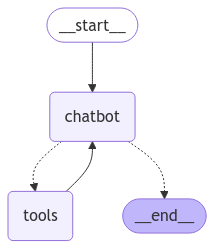

In [21]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [ ]:
# Configuration dictionary for the graph
config = {"configurable": {"thread_id": "1"}}

# Infinite loop to interact with the user
while True:
    # Get user input
    user_input = input("You: ")
    
    # Check if the user wants to exit the conversation
    if user_input.lower() == 'exit':
        print("AI: Goodbye!")
        break

    # Stream events from the graph based on user input
    events = graph.stream(
        {"messages": [("user", user_input)]}, config, stream_mode="values"
    )
    
    # Process each event and print the AI response
    for event in events:
        ai_response = event["messages"][-1].content
        print(f"AI: {ai_response}")

# Print a message indicating the conversation has ended
print("Conversation ended.")

AI: hi
AI: Hello! How can I assist you today?
AI: how are you doing  ?
AI: I'm just a computer program, so I don't have feelings, but I'm here and ready to help you! What do you need assistance with today?
AI: name 5 rules trump passed this year 
AI: 
AI: [{"url": "https://natlawreview.com/article/ira-update-recent-regulations-potentially-risk-second-trump-administration", "content": "The Trump administration's regulatory freeze could delay or nullify key renewable energy rules, including those tied to the Inflation Reduction Act"}, {"url": "https://technologymagazine.com/articles/trump-scraps-ai-risk-rules-what-you-need-to-know", "content": "What does Trump’s revoking of Biden’s AI safety order mean for global tech? Trump's revocation of Biden's AI executive order shifts US tech policies, prioritising innovation over regulation as the AI race intensifies globally This policy shift is happening when Gen AI capabilities are rapidly advancing and the global race for AI supremacy is inten